In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
dataset = pd.read_csv ('C:\\Users\\boris\\.cache\\kagglehub\\datasets\\zahidmughal2343\\video-games-sale\\versions\\1\\video games sales.csv')
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print ("Матрица признаков"); print(X[:10])
print ("Зависимая переменная"); print(y[:10])

Матрица признаков
[[1 'Wii Sports' 'Wii' 2006.0 'Sports' 'Nintendo' 41.49 29.02 3.77 8.46]
 [2 'Super Mario Bros.' 'NES' 1985.0 'Platform' 'Nintendo' 29.08 3.58
  6.81 0.77]
 [3 'Mario Kart Wii' 'Wii' 2008.0 'Racing' 'Nintendo' 15.85 12.88 3.79
  3.31]
 [4 'Wii Sports Resort' 'Wii' 2009.0 'Sports' 'Nintendo' 15.75 11.01 3.28
  2.96]
 [5 'Pokemon Red/Pokemon Blue' 'GB' 1996.0 'Role-Playing' 'Nintendo'
  11.27 8.89 10.22 1.0]
 [6 'Tetris' 'GB' 1989.0 'Puzzle' 'Nintendo' 23.2 2.26 4.22 0.58]
 [7 'New Super Mario Bros.' 'DS' 2006.0 'Platform' 'Nintendo' 11.38 9.23
  6.5 2.9]
 [8 'Wii Play' 'Wii' 2006.0 'Misc' 'Nintendo' 14.03 9.2 2.93 2.85]
 [9 'New Super Mario Bros. Wii' 'Wii' 2009.0 'Platform' 'Nintendo' 14.59
  7.06 4.7 2.26]
 [10 'Duck Hunt' 'NES' 1984.0 'Shooter' 'Nintendo' 26.93 0.63 0.28 0.47]]
Зависимая переменная
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' 'Wii Sports Resort'
 'Pokemon Red/Pokemon Blue' 'Tetris' 'New Super Mario Bros.' 'Wii Play'
 'New Super Mario Bros. Wii

In [28]:
# Проверка данных перед обработкой
print("Данные до обработки:")
print(X)
print("\nТипы данных:", X.dtype)
# Определяем, какие столбцы числовые (для стратегии 'mean')
numeric_cols = []
for i in range(X.shape[1]):
    try:
        # Пробуем преобразовать в float
        _ = X[:, i].astype(float)
        numeric_cols.append(i)
    except:
        pass
print("\nЧисловые столбцы (для mean импутации):", numeric_cols)
# Обработка пропущенных значений
if len(numeric_cols) > 0:
    # Для числовых столбцов используем mean
    imputer_num = SimpleImputer(strategy='mean')
    X[:, numeric_cols] = imputer_num.fit_transform(X[:, numeric_cols])

# Для нечисловых столбцов используем most_frequent
non_numeric_cols = [i for i in range(X.shape[1]) if i not in numeric_cols]
if len(non_numeric_cols) > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X[:, non_numeric_cols] = imputer_cat.fit_transform(X[:, non_numeric_cols])
# Результат
print("\nДанные после обработки пропусков:")
print(X)
# льтернативный вариант с ColumnTransformer (более надежный)
from sklearn.compose import ColumnTransformer

# Создаем копию данных
X_alt = df.copy() if 'df' in locals() else X.copy()

# Определяем трансформеры
transformers = [
    ('num_imp', SimpleImputer(strategy='mean'), numeric_cols),
    ('cat_imp', SimpleImputer(strategy='most_frequent'), non_numeric_cols)
]
ct = ColumnTransformer(transformers, remainder='passthrough')
X_transformed = ct.fit_transform(X_alt)
print("\nРезультат с ColumnTransformer:")
print(X_transformed)

Данные до обработки:
[[1 17.9 'Wii Sports']
 [2 15.5 'Mario Kart']
 [3 17.9 'Mario Kart']
 [4 20.3 'Tetris']
 [5 17.9 'Mario Kart']]

Типы данных: object

Числовые столбцы (для mean импутации): [0, 1]

Данные после обработки пропусков:
[[1.0 17.9 'Wii Sports']
 [2.0 15.5 'Mario Kart']
 [3.0 17.9 'Mario Kart']
 [4.0 20.3 'Tetris']
 [5.0 17.9 'Mario Kart']]

Результат с ColumnTransformer:
[[1.0 17.9 'Wii Sports']
 [2.0 15.5 'Mario Kart']
 [3.0 17.9 'Mario Kart']
 [4.0 20.3 'Tetris']
 [5.0 17.9 'Mario Kart']]


In [29]:
data = {
    'Name': ['Wii Sports', np.nan, 'Mario Kart', 'Tetris', np.nan, 'GTA V', 'Pokemon', np.nan],
    'Global_Sales': [82.74, np.nan, 35.82, 30.26, np.nan, 20.0, 15.5, np.nan],
    'Year': [2006, 2008, np.nan, 1989, 2010, 2013, 1998, 2000],
    'Target': [1, 0, 1, 0, 1, 0, 1, 0]  # Добавляем целевую переменную
}
df = pd.DataFrame(data)

# 2. Разделяем на признаки (X) и целевую переменную (y)
X = df.drop('Target', axis=1).values
y = df['Target'].values

# 3. Обработка пропущенных значений (адаптированная версия из предыдущего примера)
# Определяем числовые и категориальные столбцы
numeric_cols = [1, 2]  # Global_Sales и Year
non_numeric_cols = [0]  # Name

# Создаем трансформеры
transformers = [
    ('num_imp', SimpleImputer(strategy='mean'), numeric_cols),
    ('cat_imp', SimpleImputer(strategy='most_frequent'), non_numeric_cols)
]

ct = ColumnTransformer(transformers, remainder='passthrough')
X_processed = ct.fit_transform(X)

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, 
    y, 
    test_size=1/4, 
    random_state=0,
    stratify=y  # Стратифицированное разделение (сохраняет распределение классов)
)

# 5. Проверка результатов
print(f"Общее количество образцов: {len(X)}")
print(f"Обучающая выборка: {len(X_train)} образцов")
print(f"Тестовая выборка: {len(X_test)} образцов")
print("\nПримеры данных:")
print(pd.DataFrame(X_train[:3], columns=['Global_Sales', 'Year', 'Name']))

Общее количество образцов: 8
Обучающая выборка: 6 образцов
Тестовая выборка: 2 образцов

Примеры данных:
  Global_Sales    Year        Name
0       36.864  2000.0       GTA V
1        82.74  2006.0  Wii Sports
2       36.864  2010.0       GTA V


In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(X_test)
print(y_pred)

[135.78803035 150.28608858]


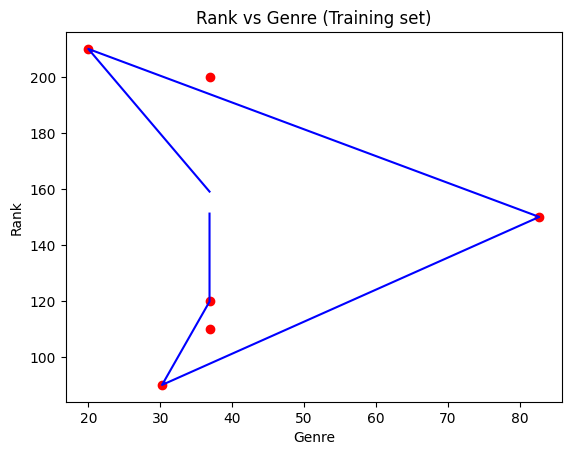

In [34]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train, color='red')  
plt.plot(X_train[:, 0], regressor.predict(X_train), color='blue')  
plt.title('Rank vs Genre (Training set)')
plt.xlabel('Genre')
plt.ylabel('Rank')
plt.show()

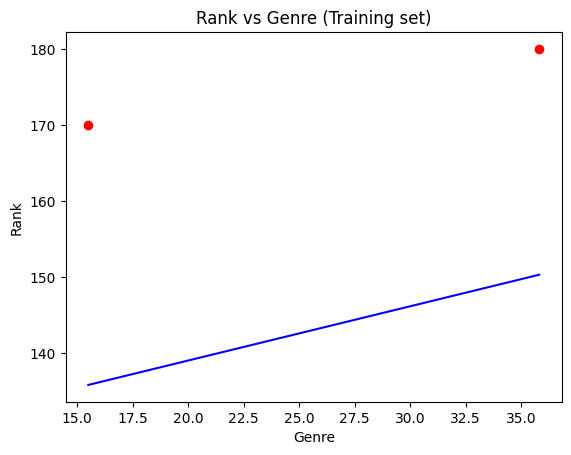

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test, color='red')  
plt.plot(X_test[:, 0], regressor.predict(X_test), color='blue')  
plt.title('Rank vs Genre (Training set)')
plt.xlabel('Genre')
plt.ylabel('Rank')
plt.show()